#  Data Visualization of Bird Strikes between 2000 – 2011

In [3]:
#importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [4]:
# Change the default font to 'DejaVu Sans'
plt.rcParams['font.family'] = 'DejaVu Sans'

In [5]:
df=pd.read_csv(r"C:\Users\aksha\OneDrive - SSN Trust\Desktop\AKSHARA\COLLEGE\random\Unified Mentor\BIRD STRIKE\Bird Strikes data.xlsx - Bird Strikes.csv")
df

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,NaN,12/30/11 0:00,No damage,...,False,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,N,0,"1,500",0,No
25554,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,NaN,12/30/11 0:00,No damage,...,False,NaN,Small,Some Cloud,Tree swallow,Y,0,0,0,No
25555,319680,NaN,NaN,NaN,EC-135,NaN,1,NaN,NaN,No damage,...,False,STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD...,NaN,No Cloud,Unknown bird - small,NaN,0,NaN,0,NaN
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,NaN,12/31/11 0:00,No damage,...,False,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,Y,0,0,0,Yes


In [6]:
#features of the dataset
df.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

In [7]:
#No. of rows and columns in the dataset
df.shape

(25558, 26)

In [8]:
#Information about the dataset
df.info

<bound method DataFrame.info of        Record ID Aircraft: Type                    Airport: Name Altitude bin  \
0         202152       Airplane                     LAGUARDIA NY    > 1000 ft   
1         208159       Airplane      DALLAS/FORT WORTH INTL ARPT    < 1000 ft   
2         207601       Airplane                LAKEFRONT AIRPORT    < 1000 ft   
3         215953       Airplane              SEATTLE-TACOMA INTL    < 1000 ft   
4         219878       Airplane                     NORFOLK INTL    < 1000 ft   
...          ...            ...                              ...          ...   
25553     321151       Airplane                REDDING MUNICIPAL    > 1000 ft   
25554     319677       Airplane                     ORLANDO INTL    < 1000 ft   
25555     319680            NaN                              NaN          NaN   
25556     319679       Airplane  DETROIT METRO WAYNE COUNTY ARPT    < 1000 ft   
25557     319593       Airplane     ABRAHAM LINCOLN CAPITAL ARPT    < 1000 ft

### DATA CLEANING

In [9]:
# Handle missing values
df.dropna(subset=['Record ID', 'FlightDate'], inplace=True)
df.fillna({'Effect: Impact to flight': 'Unknown', 'Effect: Indicated Damage': 'Unknown'}, inplace=True)

In [10]:
# Convert data types
df['FlightDate'] = pd.to_datetime(df['FlightDate'])
df['Year'] = df['FlightDate'].dt.year
df['Cost: Total $'] = df['Cost: Total $'].str.replace(',', '').astype(float)

C:\Users\aksha\AppData\Local\Temp\ipykernel_27440\500440717.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FlightDate'] = pd.to_datetime(df['FlightDate'])


### Exploratory Data Analysis (EDA)

In [11]:
# Descriptive Statistics
print(df.describe())

           Record ID  Wildlife: Number Struck Actual  \
count   25429.000000                    25429.000000   
mean   253800.148767                        2.699634   
min      1195.000000                        1.000000   
25%    225742.000000                        1.000000   
50%    248609.000000                        1.000000   
75%    269044.000000                        1.000000   
max    321909.000000                      942.000000   
std     38472.800499                       12.825804   

                          FlightDate  Cost: Total $  Number of people injured  \
count                          25429   2.542900e+04              25429.000000   
mean   2007-01-22 13:20:40.017303040   5.566368e+03                  0.000826   
min              2000-01-02 00:00:00   0.000000e+00                  0.000000   
25%              2004-06-17 00:00:00   0.000000e+00                  0.000000   
50%              2007-07-29 00:00:00   0.000000e+00                  0.000000   
75%      

In [12]:
# Frequency Distribution for categorical columns
print(df['Aircraft: Type'].value_counts())
print(df['Wildlife: Species'].value_counts())

Aircraft: Type
Airplane    25429
Name: count, dtype: int64
Wildlife: Species
Unknown bird - small          10436
Unknown bird - medium          4297
Mourning dove                   897
European starling               885
Unknown bird - large            793
                              ...  
Piping plover                     1
Chestnut-collared longspur        1
Brown thrasher                    1
Northern cardinal                 1
Pine grosbeak                     1
Name: count, Length: 345, dtype: int64


In [13]:
# Time-Series Analysis
strikes_per_year = df.groupby('Year').size()

### Visualization Examples

1. Number of Bird Strikes per Year

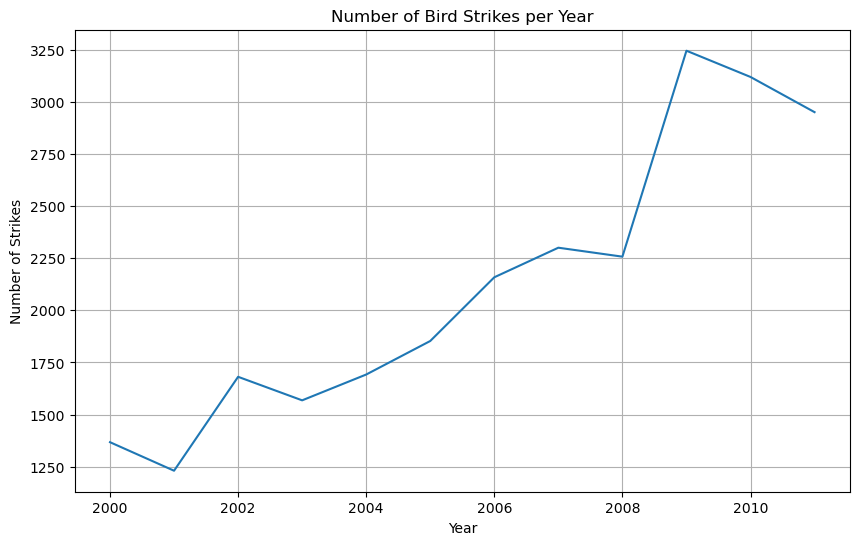

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=strikes_per_year.index, y=strikes_per_year.values)
plt.title('Number of Bird Strikes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Strikes')
plt.grid(True)
plt.show()

2. Yearly Analysis by State

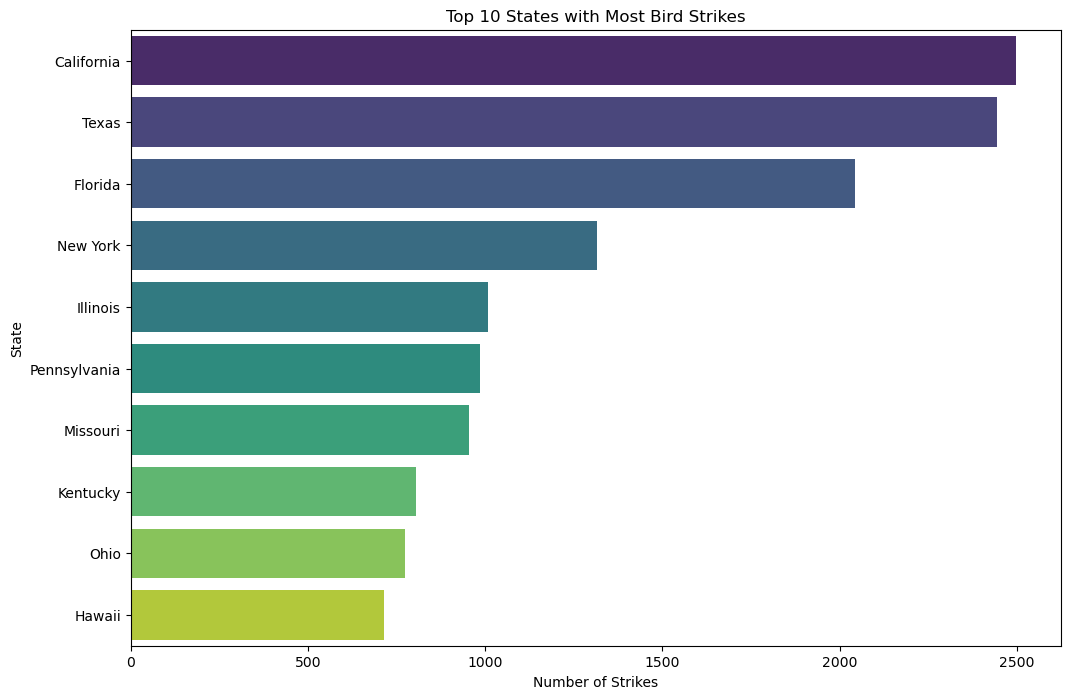

In [15]:
strikes_per_state = df['Origin State'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=strikes_per_state.values, y=strikes_per_state.index, palette='viridis')
plt.title('Top 10 States with Most Bird Strikes')
plt.xlabel('Number of Strikes')
plt.ylabel('State')
plt.show()

3. Top 10 US Airlines with Bird Strikes

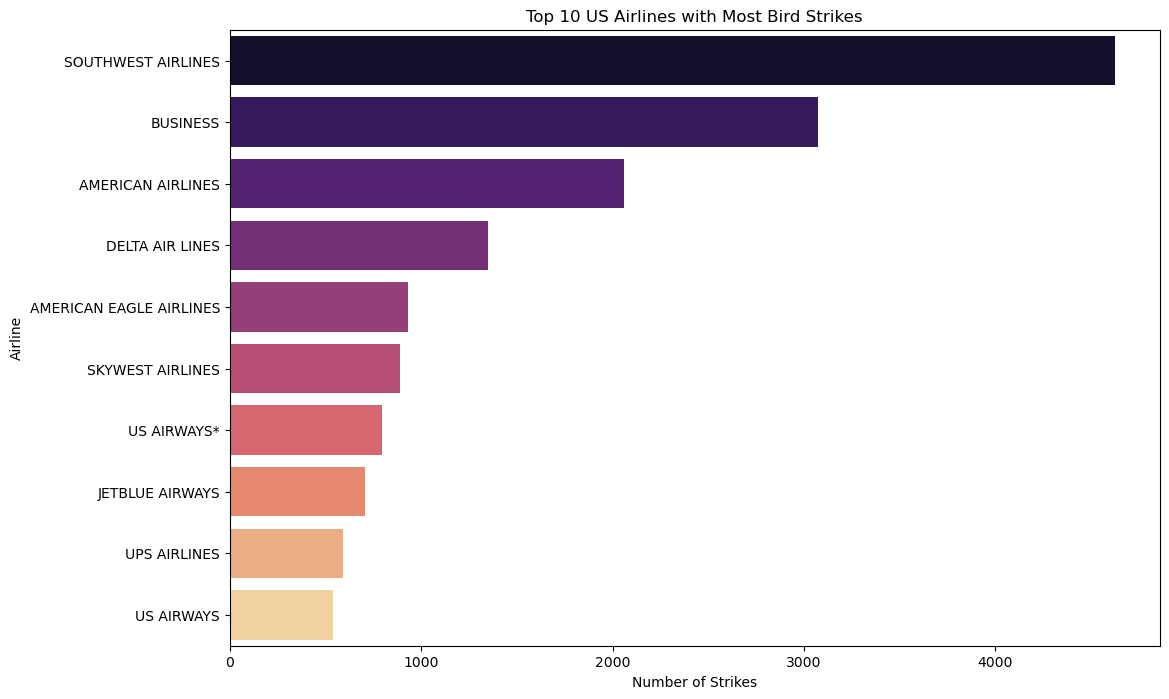

In [16]:
top_airlines = df['Aircraft: Airline/Operator'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_airlines.values, y=top_airlines.index, palette='magma')
plt.title('Top 10 US Airlines with Most Bird Strikes')
plt.xlabel('Number of Strikes')
plt.ylabel('Airline')
plt.show()

 4. Top 10 Airports with Bird Strikes

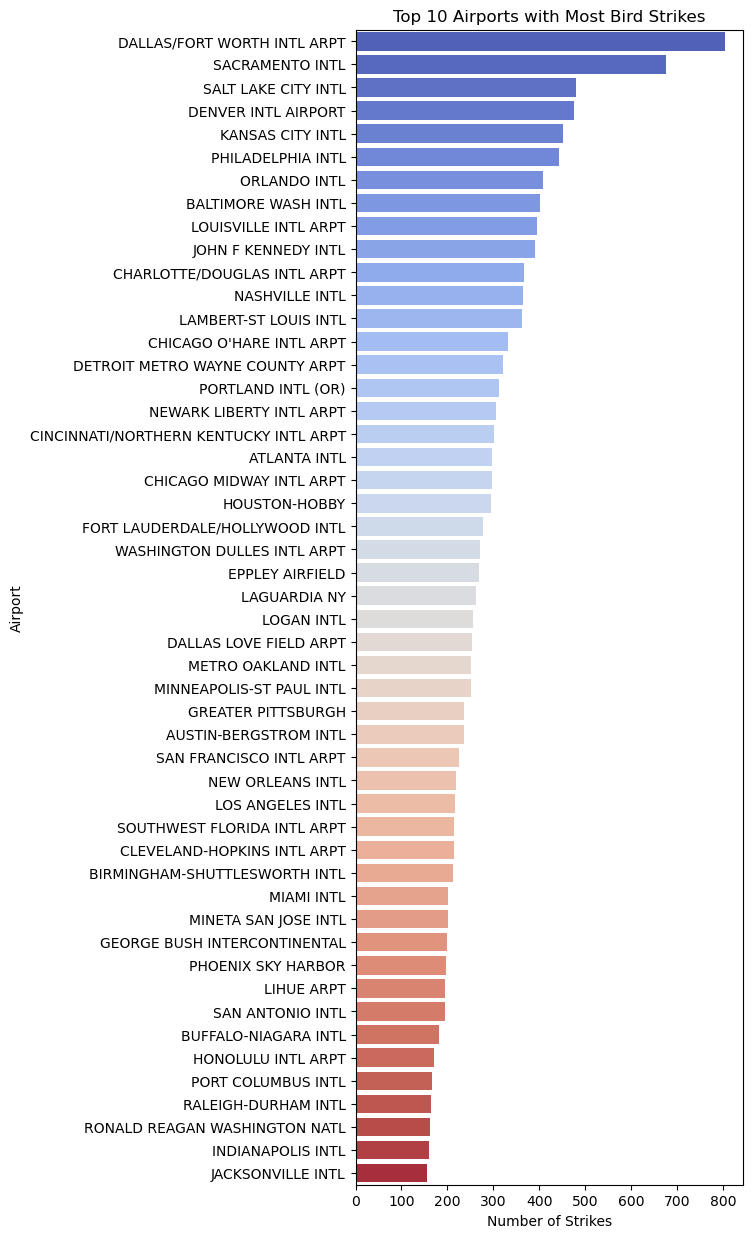

In [17]:
top_airports = df['Airport: Name'].value_counts().head(50)
plt.figure(figsize=(5, 15))
sns.barplot(x=top_airports.values, y=top_airports.index, palette='coolwarm')
plt.title('Top 10 Airports with Most Bird Strikes')
plt.xlabel('Number of Strikes')
plt.ylabel('Airport')
plt.show()

5. Yearly Cost Incurred due to Bird Strikes

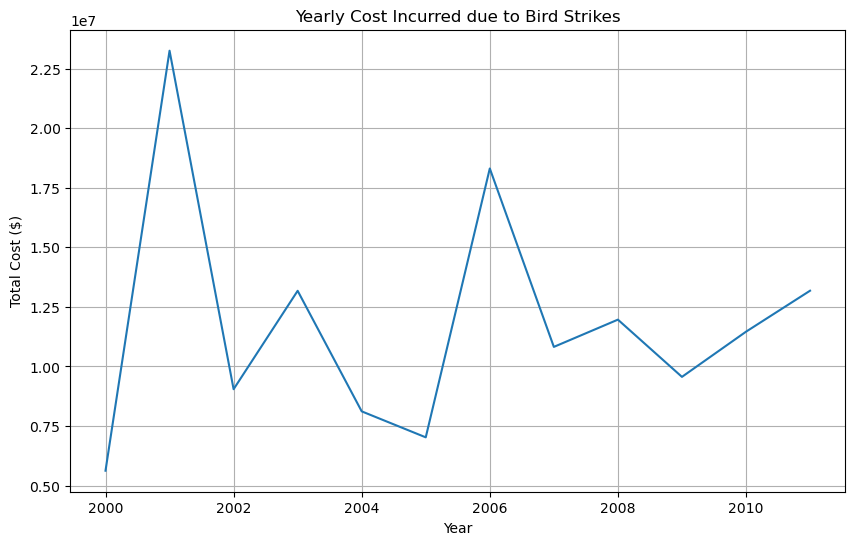

In [18]:
yearly_cost = df.groupby('Year')['Cost: Total $'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_cost.index, y=yearly_cost.values)
plt.title('Yearly Cost Incurred due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.grid(True)
plt.show()

6. When do most bird strikes occur?

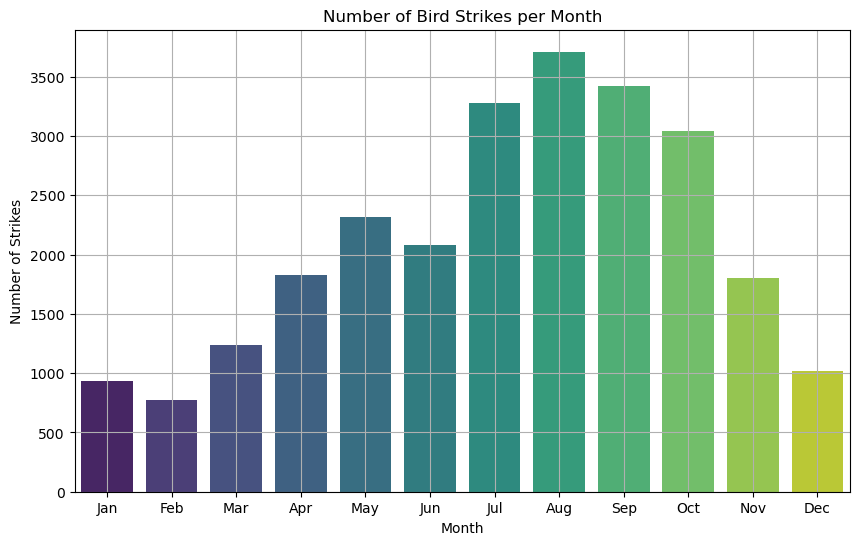

In [19]:
df['Month'] = df['FlightDate'].dt.month
strikes_per_month = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=strikes_per_month.index, y=strikes_per_month.values, palette='viridis')
plt.title('Number of Bird Strikes per Month')
plt.xlabel('Month')
plt.ylabel('Number of Strikes')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

7. Altitude of aeroplanes at the time of strike

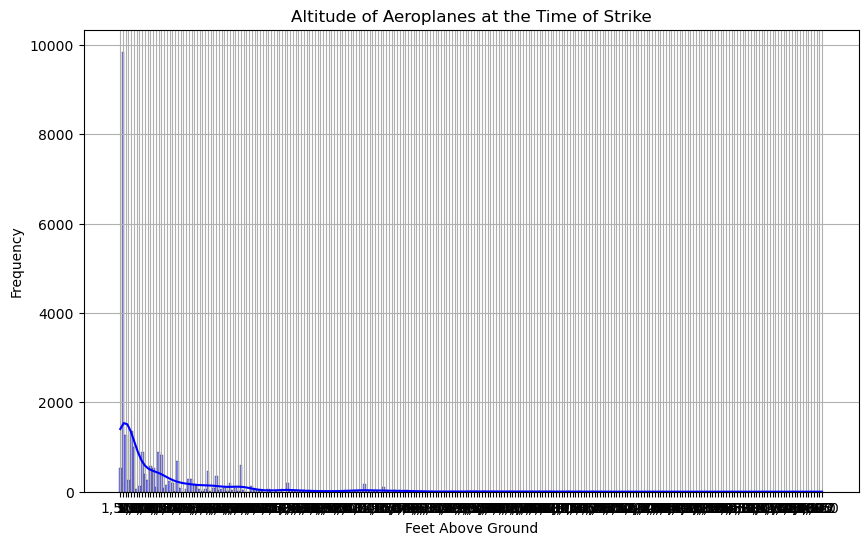

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Feet above ground'].dropna(), bins=30, kde=True, color='blue')
plt.title('Altitude of Aeroplanes at the Time of Strike')
plt.xlabel('Feet Above Ground')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

8. Phase of Flight during Strikes

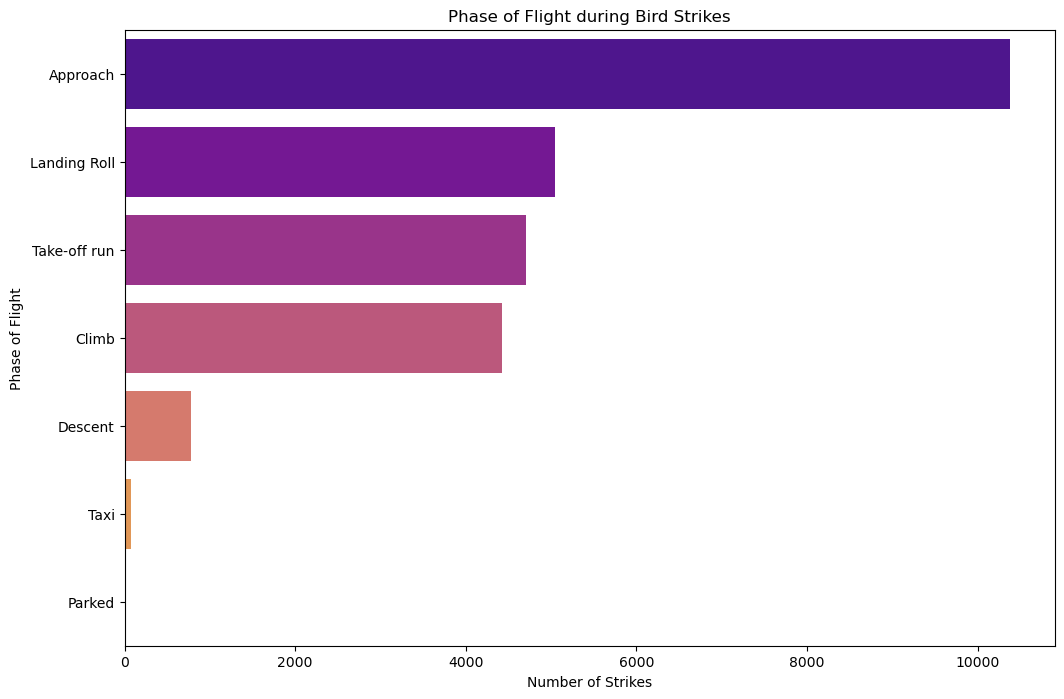

In [21]:
flight_phase = df['When: Phase of flight'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=flight_phase.values, y=flight_phase.index, palette='plasma')
plt.title('Phase of Flight during Bird Strikes')
plt.xlabel('Number of Strikes')
plt.ylabel('Phase of Flight')
plt.show()

9. Altitude Distribution at the Time of Strikes

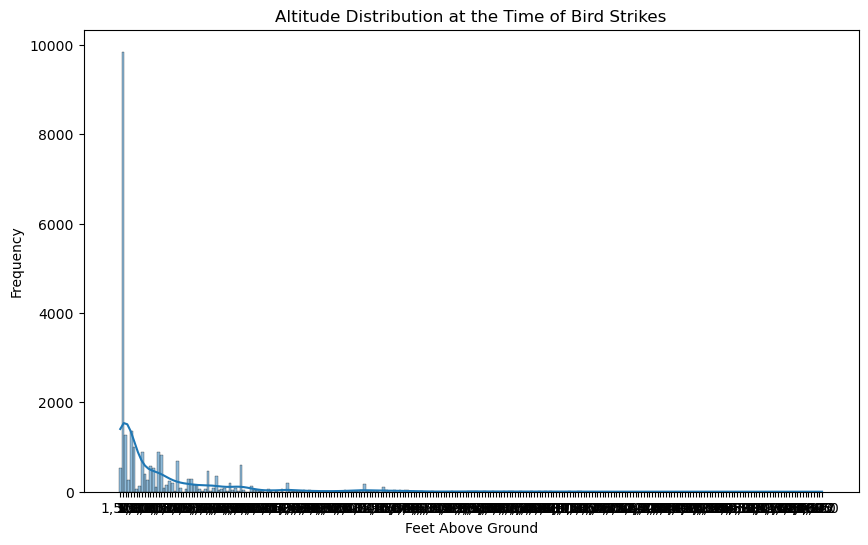

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Feet above ground'].dropna(), bins=30, kde=True)
plt.title('Altitude Distribution at the Time of Bird Strikes')
plt.xlabel('Feet Above Ground')
plt.ylabel('Frequency')
plt.show()

8. Impact of Bird Strikes on Flights

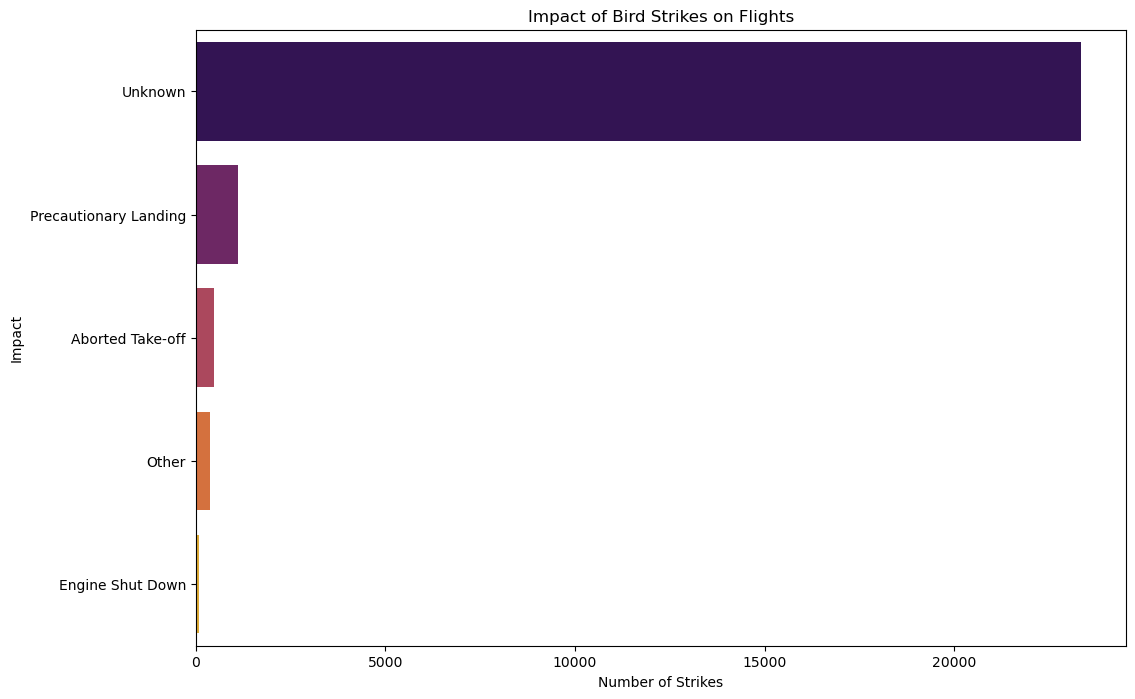

In [23]:
impact_on_flight = df['Effect: Impact to flight'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=impact_on_flight.values, y=impact_on_flight.index, palette='inferno')
plt.title('Impact of Bird Strikes on Flights')
plt.xlabel('Number of Strikes')
plt.ylabel('Impact')
plt.show()

9. Effect of Strike at Different Altitude

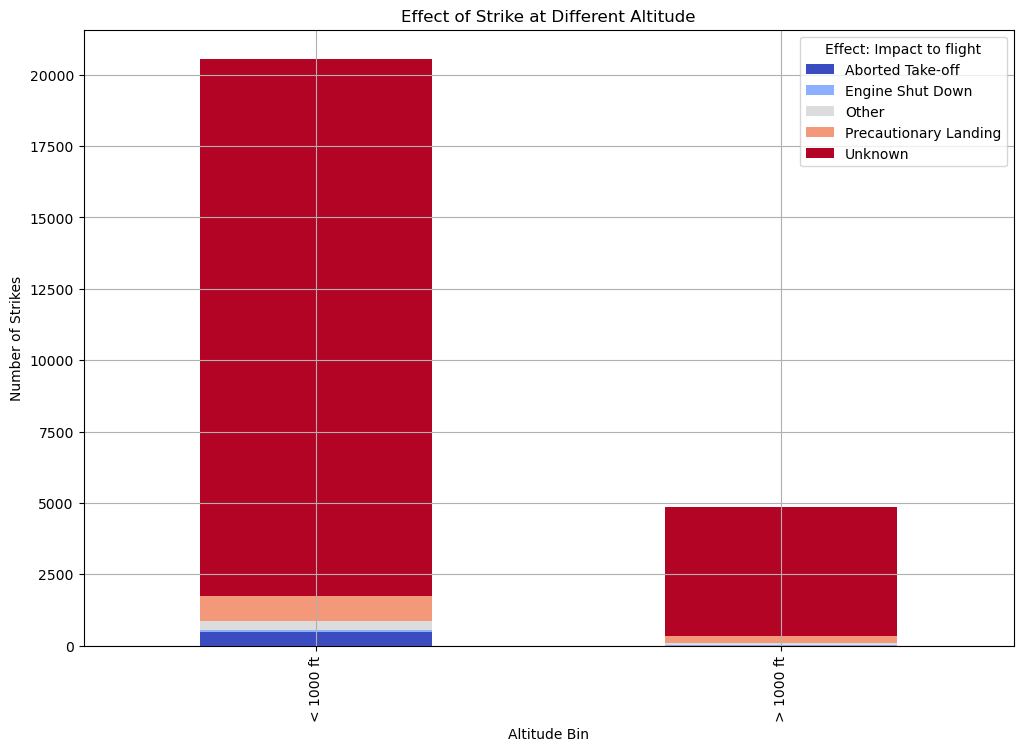

In [24]:
effect_by_altitude = df.groupby(['Altitude bin', 'Effect: Impact to flight']).size().unstack().fillna(0)

effect_by_altitude.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title('Effect of Strike at Different Altitude')
plt.xlabel('Altitude Bin')
plt.ylabel('Number of Strikes')
plt.grid(True)
plt.show()


10. Relation between Warnings and Strike Impact

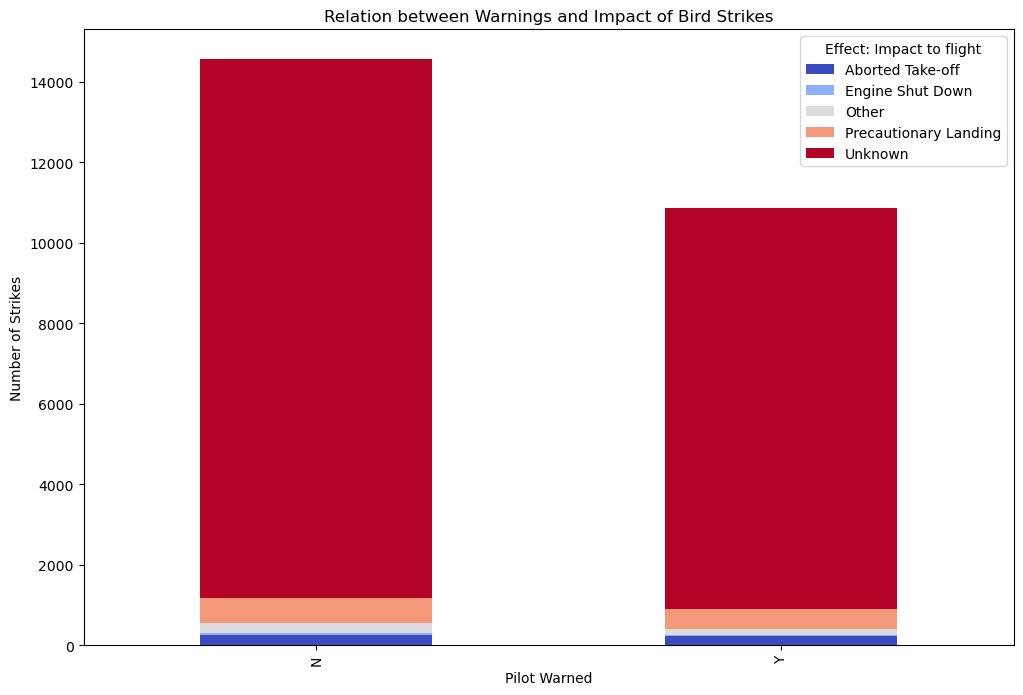

In [25]:
warnings_vs_impact = df.groupby('Pilot warned of birds or wildlife?')['Effect: Impact to flight'].value_counts().unstack()
warnings_vs_impact.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title('Relation between Warnings and Impact of Bird Strikes')
plt.xlabel('Pilot Warned')
plt.ylabel('Number of Strikes')
plt.show()

In [26]:
# Handle missing values
df = df.dropna()

# Encode categorical variables 
df_encoded = pd.get_dummies(df, drop_first=True)

In [28]:
# Select relevant features and the target variable
# For this example, let's predict 'Effect: Indicated Damage'
X = df[['Aircraft: Type', 'Altitude bin', 'Wildlife: Number struck', 'When: Phase of flight', 
        'Conditions: Precipitation', 'Wildlife: Size', 'Conditions: Sky']]
y = df['Effect: Indicated Damage']

In [30]:
# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [34]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Accuracy: 0.8525252525252526
               precision    recall  f1-score   support

Caused damage       0.46      0.26      0.33        70
    No damage       0.89      0.95      0.92       425

     accuracy                           0.85       495
    macro avg       0.67      0.60      0.62       495
 weighted avg       0.83      0.85      0.83       495



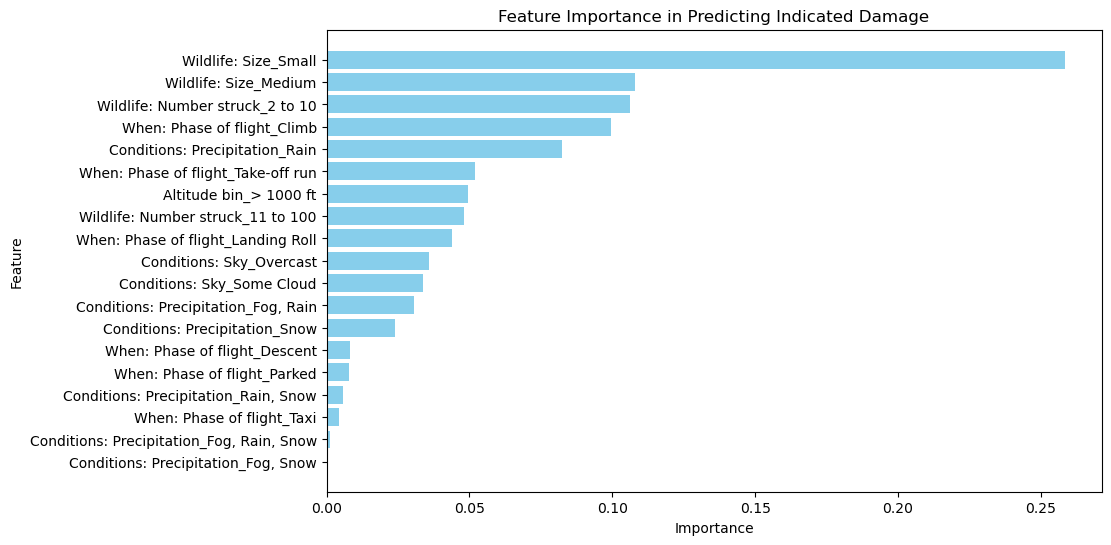

In [35]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
importance = rf_model.feature_importances_
sorted_idx = importance.argsort()
plt.barh(X.columns[sorted_idx], importance[sorted_idx], color='skyblue')
plt.title('Feature Importance in Predicting Indicated Damage')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### Insights from the Graphs:

1. Yearly Increase in Bird Strikes:
   - If the graph shows an increasing trend in bird strikes over the years, it indicates that the risk of bird strikes is becoming more pronounced. This could be due to several factors, including increased air traffic, changes in bird migration patterns, or expansion of airports into areas with higher bird populations.

2. Most Critical Phases of Flight:
   - If a bar chart shows that bird strikes are most frequent during takeoff and landing phases, this underscores the need for heightened vigilance and preventive measures during these flight stages. The proximity of birds to ground level and the airport environment contributes to this risk.

3. High-Risk Airports:
   - A visualization ranking airports by the number of bird strikes can pinpoint specific locations that require more rigorous bird control measures. Airports situated near water bodies, forests, or other natural habitats are typically more susceptible to bird strikes.

4. Time of Day Patterns:
   - If the heatmap reveals that bird strikes are more common during dawn or dusk, it suggests that these are the periods when birds are most active and thus pose a greater risk to aircraft. These insights can guide operational adjustments and scheduling.

5. Altitude Vulnerabilities:
   - If the data indicates that most bird strikes occur at lower altitudes, especially below 3,000 feet, it emphasizes the need for effective bird management strategies close to the airport and during the initial climb and final approach phases.

6. Impact on Aircraft:
   - If a pie chart reveals that a significant portion of bird strikes results in minor or major damage, it stresses the potential economic and safety impacts of these incidents. Understanding the severity can prioritize investment in bird strike prevention technologies.




#### Suggested Solutions to Minimize Bird Strikes:

1. Enhanced Bird Detection and Deterrent Systems:
   - Implementing radar-based bird detection systems around airports can provide real-time monitoring of bird activity. Coupled with deterrents like bioacoustics, pyrotechnics, and laser systems, this can help reduce the likelihood of birds entering flight paths.

2. Wildlife Management Programs:
   - Airports should invest in comprehensive wildlife management programs that include habitat modification, such as grass height management and water drainage, to make the environment less attractive to birds. Regularly reviewing and updating these programs based on the latest data is essential.

3. Operational Adjustments:
   - Adjusting flight schedules to avoid high-risk periods (e.g., dawn and dusk) and implementing altitude-specific strategies during takeoff and landing can reduce the risk of bird strikes.

4. Collaboration with Environmental Agencies:
   - Working closely with environmental and wildlife agencies to track bird migration patterns and seasonal behaviors can provide crucial information for planning and risk assessment. 

5. Education and Training:
   - Providing pilots and ground staff with regular training on bird strike risk management and the latest detection technologies can improve response times and decision-making during potential incidents.

